(pz_analysis)=
# Unit 2.3: Pole-Zero Analysis

## Learning Outcomes

In this unit, students will...

* Describe how the transfer function of a DC motor is derived.
* Identify the poles and zeros of a transfer function.
* Assess the stability of an LTI system based on the transfer function poles.

* Relate the position of poles in the s-plane to the damping and natural frequency of a system.
* Explain how poles of a second-order system relate to its dynamics.
* Examine how transfer function zeros affect the dynamics of a system.

:::{note}
This unit is based on the MATLAB LiveScript `PoleZeroAnalysis.mlx` from the curriculum module [Transfer Function Analysis of Dynamic Systems](https://github.com/MathWorks-Teaching-Resources/Transfer-Function-Analysis-of-Dynamic-Systems). 

Some of the examples rely on interactive features of MATLAB that are not readily reproduced in these notes. To make use of these facilities, you are advised to access the script directly from the project in MATLAB online.

These materials © Copyright 2023 The MathWorks™, Inc. (See {ref}`mathworks_license`).
:::

In [28]:
%% Lecturer: set up the TransferFunctions project for in class execution of exercise tests and activities.

% Setup MATLAB to use the PoleZeroAnalysis.mlx LiveScript and the polesApp.mlapp app in class.
% I am assuming that this is on the MATLAB Drive

format compact 
% Change this to local set up where this Jupyter book is run
cd '/Users/eechris/MATLAB-Drive/Repositories/Transfer-Function-Analysis-of-Dynamic-Systems'
open('TransferFunctions.prj')

## Transfer function representation of a DC motor

Another essential electric vehicle (EV) component is the DC motor. 

![Simplified EV schematic](images/engineFocus.png)

Simplified EV schematic

The purpose of the DC motor is to convert electrical energy to mechanical. The mechanical energy is manifested as a torque on the drive shaft. This torque is converted to a traction force by the wheels, which causes the vehicle to move.

![Motor highlighted in a simple EV systemt](images/EVSimpleSystemMotorHighlight.png)

The DC motor bridges the electrical and physical domains.

A DC motor works by conducting a current through an armature that can rotate freely. The fixed brushes transmit the current to the rotating commutators. The current flowing through the armature passes through a magnetic field generated by the stator magnets, resulting in a Lorentz force in the perpendicular direction ($\mathbf{F} = i\mathbf{\ell} \times \mathbf{B}$, where $\mathbf{\ell}$ points in the wire direction). The two sides of the armature each produce a force, resulting in a net torque on the rotor $T$. If sufficient torque is applied, the shaft rotates, changing the angular position $\theta$.

![A schematic diagram of a DC motor](images/motorDiagram.png)

DC motor schematic. A net torque $T$ is generated on the armature by Lorentz forces. In the electrical domain, the motor is represented by a series of three circuit elements.

### Derivation of the DC motor differential equations

Under typical operating conditions, the torque generated by a DC motor is directly proportional to the current passing $i$ through it:

$$T = k_mi$$

where $k_m$ is a proportionality constant determined by the characteristics of the specific motor. This relationship fails for large values of $i$.

When the armature rotates, it generates a back electromotive force ([back EMF](https://en.wikipedia.org/wiki/Counter-electromotive_force)) that opposes the applied voltage. In the circuit diagram, this is represented by a motor symbol. The voltage drop due to the back EMF, denoted $e$, is proportional to the rotational velocity of the armature:

$$e =k_e \dot{\theta}$$

where $k_e$ is a constant of proportionality. To derive the relationship between the current $i$ and the motor shaft angular position $\theta$, you can apply Kirchhoff's voltage law and Newton's second law in terms of torques acting on the motor shaft.

Kirchhoff's voltage law implies that the sum of the voltage drops across the circuit must equal the applied voltage:

$$
iR + L \frac{di}{dt} + k_e \dot{\theta} = v
$$ (eq1)

where $v$ is the electric potential applied to the motor.

In the absence of other applied torques, the equation of motion can be derived by balancing the inertia of the motor shaft ($J \ddot{\theta}$) with the applied torque ($T$) and frictional resistance ($B \dot{\theta}$).

$$
J \ddot{\theta}  = T - B \dot{\theta}
$$

Using the linear relationship between torque and current, this is equivalent to:

$$
J \ddot{\theta} + B \dot{\theta}  = k_m i
$$ (eq2)

### Exercise 1

![exercise](images/write.png)

In this exercise, you will compute transfer functions of the DC motor system. Assume that the system starts at rest ($i = i' = \theta = \dot{\theta} = 0$). Also, assume that the applied voltage is a function of time $v = v(t)$.

:::{note}
We will do some of these calculations in class. To revise this material, we recommend that you use the the MATLAB LiveScript `PoleZeroAnalysis.mlx` from the curriculum module [Transfer Function Analysis of Dynamic Systems](https://github.com/MathWorks-Teaching-Resources/Transfer-Function-Analysis-of-Dynamic-Systems) and fill in your answers there. The LiveScript provides checking functions with which you can validate your answers. 
:::

(ex1a)=
#### 1(a) 

Compute the Laplace transform of the voltage conservation equation {eq}`eq1` and apply the initial conditions. Type your result below in terms of the defined symbolic variables.

#### Pro-tip

![matlab](images/matlab.png)

When you write a symbolic equation, you assign the whole equation to a MATLAB variable using the assignment operator "`=`" (single equals). The equals sign in the symbolic equation is written using "`==`" (double equals). For example: 

```matlab
syms y m x b
linearEq = y == m*x + b
```

In [29]:
format compact
% Use these symbolic variables
syms L R k_e J B k_m    % Constants
syms Theta I s V        % Laplace domain variables
% Write your laplace transform equation here
eqn1 = R*I + L*s*I + s*k_e*Theta == V

eqn1 =
I*R + I*L*s + Theta*k_e*s == V


(ex1b)=
#### 1(b) 

Compute the Laplace transform of the equation of motion {eq}`eq2` and apply the initial conditions. Type your answer below in terms of the defined symbolic variables.

In [30]:
% Write your laplace transform equation here
eqn2 = J*s^2*Theta + B*s*Theta == k_m*I

eqn2 =
J*Theta*s^2 + B*Theta*s == I*k_m


(ex1c)=
#### 1(c) 

Solve for the angular displacement transfer function 

$$G(s) = \frac{ \Theta(s) }{V(s)}$$

using your results from {ref}`ex1a` and {ref}`ex1b`.

In [31]:
% Write your transfer function here
ThetaOverV = k_m/(s*(L*J*s^2 + (R*J+L*B)*s + B*R + k_m*k_e))

ThetaOverV =
k_m/(s*(J*L*s^2 + (B*L + J*R)*s + k_e*k_m + B*R))


(ex1d)=
#### 1(d) 

Solve for the angular velocity transfer function 

$$H(s) = \frac{\Omega(s)}{V(s)}$$ 

where $\Omega$ is the Laplace transform of the angular velocity $\omega(t) = \dot{\theta}(t)$.

In [32]:
% Write your transfer function here
OmegaOverV = k_m/(L*J*s^2 + (R*J+L*B)*s + B*R + k_m*k_e)

OmegaOverV =
k_m/(J*L*s^2 + (B*L + J*R)*s + k_e*k_m + B*R)


## Pole analysis
You can gain insight into the characteristics of a dynamic system without actually solving it by analyzing the form of its transfer function. The poles of the transfer function offer the most insight.

**Definition**. The **poles** of a rational transfer function occur where the denominator is zero. Consider a rational transfer function in factored form:

$$
G(s) = K \frac{ (s-z_1)(s-z_2) \ldots (s-z_m) }{ (s-p_1)(s-p_2) \ldots (s-p_n)}
$$

The poles are $p_1$, $p_2$, $\ldots$, $p_n$.

### Stability
The real parts of the poles determine the stability of the system.

1. A pole with a positive real part ($\text{Re}(p_i) > 0$) characterizes an exponential growth component of the solution.

2. A pole with a negative real part ($\text{Re}(p_i) < 0$) characterizes an exponential decay component of the solution.

3. A pole with a zero real part ($\text{Re}(p_i) = 0$) characterizes a steady component of the solution.

Poles with an imaginary component ($\text{Im}(p_i) \neq 0$) generate oscillatory behavior. Such poles necessarily come in conjugate pairs (so that their product is real).

![](images/polePlaneV4.png)
Impulse responses characterized by the position of poles in the complex s-plane.

:::{note}
Poles in the left-half plane (where $\text{Re}(p) < 0$) are stable. The poles in the bottom-half plane are the conjugate poles required for the imaginary poles.
:::

#### Activity 1

![](images/activity.png)

In this activity, you will visually explore the relationship between transfer function poles and time-domain responses.

**Part 1**. Use the app
1. Begin the activity by running the attached app: `polesApp.mlapp`
2. Show the impulse response of the default system by clicking the compute response button.
3. Click and drag the poles to different locations in the s-plane and recompute the response.

In [33]:
open('polesApp.mlapp')

```{figure} images/polesApp.png
:alt: The polesApp app
:width: 75%
:align: centre

A screenshot of the `polesApp.mlapp` app
```

**Part 2**. Transfer function poles
1. You can change the transfer function by adjusting the number and location of the poles and zeros. Set the number of poles to two and change the location of the poles to $p = -1, -2$. The transfer function should be $F(s) = 1/[(s+1)(s+2)]$. Is the system stable or unstable?
2. Adjust the number of poles and their locations to reproduce the transfer functions shown below.
   
   a. $F(s) = \frac{1}{s^2 + 1}$            
   b. $F(s) = \frac{1}{(s-1)(s^2+2s+2)}$            
   c.  $F(s) = \frac{1}{(s-1)(s+2)(s^2+4s+8)}$
3.  Which of the transfer functions are stable? Which are unstable?

**Part 3**. Single pole system responses

1. Change the number of poles (/pole pairs) to 1. Also, adjust the stop time of the response simulation to ~20 seconds using the slider.
2. Adjust the position of the pole (or pole pair, when the pole is complex) to produce graphs similar to the various impulse responses shown below.

![Single pole plots](images/singlepoleplots.png)

**Part 4**. Two pole system responses
1. Change the number of poles (/pole pairs) to 2. Continue to observe the impulse responses with a final time of 20 seconds.
2. Adjust the pole positions to reproduce the behaviors shown in the plots below.

![Double pole plots](images/doublepoleplots.png)

#### Reflect. 

![reflect](images/reflect.png)

* What effect does increasing the magnitude of the imaginary component of a pole have? 
* What effect does increasing the magnitude of the real component of a pole have?
* In a system with one stable pole and one unstable pole, is it possible for a stable pole to "balance out" an unstable pole, leading to an overall stable system?

:::{note}

Complete the homework exercises in the MATLAB LiveScript `PoleZeroAnalysis.mlx`.
:::

(hw3-exercise-1)=
#### Homework Exercise 1

![exercise](images/write.png)

You can write the DC motor angular velocity transfer function as

$$\frac{\Omega}{V} = \frac{g}{ s^2 + bs + c}$$

##### Homework Exercise 1(a) 

Suppose that a DC motor has constants $g =60$, $b = 2.3$, and $c = 11$. Define the transfer function in MATLAB using the [`tf`](https://uk.mathworks.com/help/control/ref/tf.html) function.

In [34]:
% Write your code here
g = 60; b = 2.3; c = 11;
G = tf([0 0 g],[1 b c])


G =
 
         60
  ----------------
  s^2 + 2.3 s + 11
 
Continuous-time transfer function.


 
##### Homework Exercise 1(b) 

Is the system stable? You can plot the poles in the s-plane using the [`pzmap`](https://www.mathworks.com/help/control/ref/lti.pzmap.html) function. For example, to plot the poles of a transfer function G, use:
```matlab
pzmap(G)
```

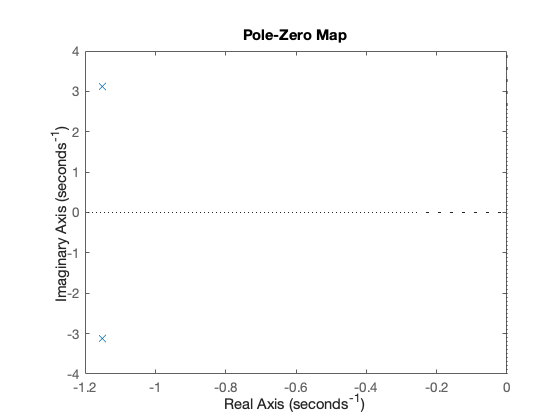

In [35]:
% Write your code here
pzmap(G)


 
##### Homework Exercise 1(c) 
What are the poles of the transfer function? You can use the [`pole`](https://www.mathworks.com/help/control/ref/lti.pole.html) function to compute the poles of a dynamic system in MATLAB. For example, to identify the poles of a transfer function R, use:
```matlab
pole(R)
```

In [36]:
% Write your code here
pole(G)

ans =
  -1.1500 + 3.1109i
  -1.1500 - 3.1109i


##### Reflect. 

![reflect](images/reflect.png)

* What response would you expect for a brief (impulse) applied voltage in a physical DC motor?
* Based on the poles identified in this exercise, what impulse response do you expect?
* Does the behavior suggested by the poles match your intuition for a physical DC motor? Does the pole analysis suggest any unexpected behaviors?

### Natural frequency
The locations of the poles in the s-plane determine the natural oscillation frequencies present in the system.

* The natural (undamped) frequency (in rad/s) contributed by a pole $p$ is the pole magnitude, $r = |p|$. 
* The phase, $\phi = \arg p$, determines the relative strength of the oscillatory component.

![](images/complexPhaseMag.png)
Phase $\phi$ and magnitude $r$ of pole $p$ shown in the complex plane

#### Activity 2

![activity](images/activity.png)

In this activity you will explore how poles relate to the natural frequency response.

Consider the transfer function:

$$H(s) = \frac{1}{s^2 -2\,\mathrm{cos}\left(\phi \right)\,r\,s+r^2},$$  

which is constructed with poles: $p = r(\cos \phi \pm i\sin \phi)$.
1. The transfer function poles are plotted below. Change the slider values to $(r,\phi) = (1,135^\circ)$. Are oscillations present in the impulse response?
2. Set $(r,\phi) = (1,100^\circ)$ and then $(r,\phi) = (1,90^\circ)$. Does the frequency of the oscillation change? Are the oscillations more prominent?
3. Set $(r,\phi) = (1.5,90^\circ)$ and then $(r,\phi) = (2,90^\circ)$. Does the frequency of the oscillation change? Are the oscillations more prominent?

The activity needs to be done in the MATLAB LiveScript `PoleZeroAnalysis.mlx`

In [37]:
open('PoleZeroAnalysis.mlx')

#### Reflect

![reflect](images/reflect.png)

* Does the conjugate pole $p = r(\cos \phi - i\sin \phi)$ contribute a different natural frequency than the first pole $p = r(\cos \phi + i\sin \phi)$? Why or why not?
* As $r$ increases, does the frequency increase or decrease?
* As $\phi$ approaches $180^\circ$, does the oscillation become more or less prominent?

#### Exercise 2 

A specific example of the DC motor angular velocity transfer function is
```matlab
G = tf([0 0 60],[1 2.3 11])
```
##### Exercise 2(a) 

Compute the poles of the system and then use the poles to compute the system's natural frequencies in rad/s.

In [38]:
% Write your code here
G = tf([0 0 60],[1 2.3 11])
p = pole(G)
wn = abs(p) % rad/s


G =
 
         60
  ----------------
  s^2 + 2.3 s + 11
 
Continuous-time transfer function.
p =
  -1.1500 + 3.1109i
  -1.1500 - 3.1109i
wn =
    3.3166
    3.3166


 
##### Exercise 2(b) 

You can also use the `damp` function to analyze the natural frequencies of the system. Validate your solution in (a) by calling the `damp` function.

In [39]:
% Write your code here
damp(G)

                                                                       
         Pole              Damping       Frequency      Time Constant  
                                       (rad/seconds)      (seconds)    
                                                                       
 -1.15e+00 + 3.11e+00i     3.47e-01       3.32e+00         8.70e-01    
 -1.15e+00 - 3.11e+00i     3.47e-01       3.32e+00         8.70e-01    


##### Reflect

![reflect](images/reflect.png)


* What physical interactions cause the oscillatory behavior in the DC motor system?
* The `damp` function offers an additional output: damping. What does this value represent?

### Analysis of a second-order system

Second-order systems with a pair of conjugate poles and no zeros are useful for illustrating the natural frequency response analytically. It is helpful to write this type of system in the form:

$$G(s) = \frac{ K }{s^2 + 2 \zeta \omega_n s  + \omega_n^2}$$

where 
* $K$ is the gain coefficient
* $\zeta$ is the damping ratio
*  and $\omega_n$ is the (undamped) natural frequency.

These parameters are helpful for drawing a connection between the natural response of the system and the properties of the poles. In this section, the poles of the second-order system will be analytically computed and related to the natural response of the system.

#### Pole analysis
The poles of the system occur when the denominator is zero:

$$p = - \zeta \omega_n \pm \omega_n \sqrt{\zeta^2 - 1 }$$

For simplicity, consider $\zeta \in [0,1)$. In this case, the poles are

$$p = - \zeta \omega_n \pm j \omega_n \sqrt{1 - \zeta^2}$$

As stated above, the natural frequency is defined as the magnitude of the pole. The magnitude is computed as $\sqrt{ Re^2 + Im^2}$:

\begin{array}{rl} |p|  &= \sqrt{ (-\zeta \omega_n)^2 + ( \pm \omega_n \sqrt{1-\zeta^2})^2 } \\   &= \sqrt{ \zeta^2 \omega_n^2 + \omega_n^2 (1-\zeta^2) } \\   &= |\omega_n|\  
\end{array}

##### Natural frequency $\omega_n$

This illustrates why this form of the equation is used: the natural frequency is the parameter $\omega_n$.

##### Damping ratio $\zeta$

The damping ratio $\zeta$ determines the relative strength of the exponential part of the response. 

As $\zeta \rightarrow 1$, the complex part of the pole tends to zero, implying less oscillatory and stronger exponential behavior. 

For stable systems, that implies greater damping.

##### Gain coefficient $K$

The gain coefficient $K$ affects the magnitude of the response, not the time-dependent behavior.

#### Natural response
The impulse response is also called the *natural response*. The natural response $x(t)$ is computed by taking the inverse Laplace transform of

$$\frac{X(s)}{U(s)} = \frac{X(s)}{1} = \frac{ K }{s^2 + 2 \zeta \omega_n s  + \omega_n^2}$$

because the impulse $u(t) = \delta(t)$ has a Laplace transform $U(s) = 1$. You can find the response's analytic form by referring to a table or using the [`ilaplace`](https://www.mathworks.com/help/symbolic/sym.ilaplace.html) function.

In [40]:
syms s zeta omega_n K X(s) x(t)
X(s) = K/(s^2 + 2*zeta*omega_n*s + omega_n^2) 
x(t) = ilaplace(X) % The impulse response in the time domain

X(s) =
K/(omega_n^2 + 2*zeta*omega_n*s + s^2)
x(t) =
(K*exp(-omega_n*t*zeta)*sin(omega_n*t*(1 - zeta^2)^(1/2)))/(omega_n*(1 - zeta^2)^(1/2))


Notice that the impulse response is a product of an exponential and sine function. From these functions observe that:
* The sine function frequency (in rads/s) is $\omega_n \sqrt{1-\zeta^2}$. If the damping $\zeta = 0$, then the frequency is $\omega_n$. This is the reason $\omega_n$ is often referred to as the undamped natural frequency.
* The rate of decay of the exponential damping function is $\omega_n \zeta$. 
* The gain parameter $K$ only contributes as a constant multiplier to the magnitude of the response.

##### Activity 3

![activity](images/activity.png)

Open the MATLAB LiveScript `PoleZeroAnalysis.mlx` and find this activity there. Adjust the sliders to view different time-domain responses for the classical second-order system:

$$G(s) = \frac{ K }{s^2 + 2 \zeta \omega_n s  + \omega_n^2}$$

##### Reflect. 
* Does the carrier frequency of the solution change with the damping coefficient $\zeta$?
* Does the exponential envelope change with $\omega_n$?
* How does the gain $K$ affect the response?

(hw3-exercise-2)=
#### Homework Exercise 2: Mass-spring-damper analysis

![exercise](images/write.png)

You can analyze a mass-spring-damper by looking at the poles of its transfer function.

![Mass-spring damper system](images/mass_spring_damper2-flipped.png)
Mass-spring-damper diagram

Consider a mass-spring-damper that
* is dynamically forced by an arbitrary function $u(t)$
* has zero initial conditions: $x(0) = 0$ and $x'(0)=0$

The position transfer function is
$$G(s) = \frac{X(s)}{U(s)} = \frac{1}{ m s^2 + cs + k}$$

#### Homework Exercise 2(a) 

Write the mass-spring-damper transfer function in the form 

$$G(s) = \frac{ K }{s^2 + 2 \zeta \omega_n s  + \omega_n^2}$$

and solve for the expressions of the gain $K$, damping ratio $\zeta$, and natural frequency $\omega_n$ in terms of the mass-spring-damper parameters. Write your answers using the symbolic variables `c`, `m`, and `k`.

In [41]:
% Use these symbolic variables
syms m c k
% Replace the NaNs with your expressions
K = NaN;
omega_n = NaN;
zeta = NaN;

#### Homework Exercise 2(b) 

Solve for the symbolic expressions of the poles of `G` in terms of the mass-spring-damper parameters `m`, `c`, and `k`. Store the expressions below in `pplus` and `pminus` where `pplus` stores the positive root.

In [42]:
% Write your answers here
poles = NaN;
pplus = NaN;
pminus = NaN;

#### Homework Exercise 2(c) 

You can gain insight into the dynamics of the system by examining how the poles change in the $s$-plane when parameters are varied. 
* The graph given in the MATLAB LiveScript `PoleZeroAnalysis.mlx` shows the pole locations under variations of a parameter starting with $k = m = 1$ and $c = 0$.
* Adjust the dropdown to change which parameter is varied. 
* The curves plot the pole locations between the specified parameter's starting value and maximum value. Try changing the dropdown and the `maxValue` to observe changes to the poles.
* Use the plot to answer the reflection questions.

##### Reflect. 

![reflection](images/reflect.png)

* What happens to the poles when $c = 2$? Physically, what does this represent?
* If any of the parameters are (individually) negative, what happens to the poles? What are the physical implications of negative parameters?
* As $k$ is increased, what happens to the poles? How does this relate to the natural frequency expression that you solved for in part (a) ($\omega_n = \sqrt{k/m}$)?

## Zero analysis
The analysis of zeros is less straight-forward than the analysis of the poles of the system, because their effects are less pronounced. Zeros contribute to
* the transient behavior of the response,
* the magnitude of the response, and
* the response to different input frequencies.

:::{note}
Use the MATLAB LiveScript PoleZeroAnalysis.mlx and the `polesApp` app to complete these Activities. 
:::

#### Activity 4

![activity](images/activity.png)

Consider the simple system:

$$G(s) = \frac{ s-z_0}{s+1}$$

Adjust the location of the zero using the slider and observe the changes to the response.

#### Reflect. 

![reflection](images/reflect.png)

* Is the stability or long-term behavior of the system affected by the zero location?
* How is the transient response affected by the zero?
* Does the system become unstable when the zero is in the right-half plane?
* What happens as the zero approaches the pole?

#### Activity 5

![activity](images/activity.png)

In this activity, you will visually explore the relationship between transfer function zeros and time-domain responses. You will inspect the step responses of

$$G = \frac{s-z_0}{s^2 + 2s + 2}$$

* Begin the activity by running the attached app, `polesApp.mlapp`. Note that this link will only work if `polesApp.mlapp` is in the current folder or on the MATLAB Search Path.

In [43]:
open('polesApp.mlapp')

* Set the number of poles/pole pairs to 1
* Place the pole pair at $p = -1 \pm i$.
* View the step response by selecting Step in the Response type menu.
* Add a zero to the plot. Adjust the position of the zero to generate the step responses shown below.

![Zero pole plots](images/zeroPlotPart1.png)

##### Reflect 
* The transient of the step response that exceeds the steady value (y = 1, in this case) is known as the overshoot. As the zero moves further in the negative direction along the real axis, what happens to the overshoot?
* The time it takes to reach the steady value (y = 1, in this case) is known as the rise time. How is the rise time affected by changes to the zero, z_0?
* Try other values of the poles and zero, do you observe similar changes to the overshoot and rise time?

(hw3-exercise-3)=
### Homework Exercise 3 : Transfer Function with a Single Zero

![homework](images/write.png)

In this exercise, you will examine the changes to the analytic step response of a transfer function with a single zero.

Consider the transfer function used in the previous activity:

$$G = \frac{s-z_0}{s^2 + 2s + 2}$$

#### Homework Exercise 3(a) 

Compute the symbolic form of the step response of the transfer function, $x(t$). You can perform the analytic computations by hand or using the Symbolic Math Toolbox.

In [44]:
% Use these symbolic variables
syms s z_0 t positive 
% Write your solution here
x = NaN

x =
   NaN


#### Homework Exercise 3(b) 

Plot the analytic step response with $z_0 = -1$ on the interval $t \in [0, 10]$. If you computed the step response function with the Symbolic Math Toolbox, you can use the [`matlabFunction`](https://www.mathworks.com/help/symbolic/matlabfunction.html) command to convert it to a function handle that you can evaluate.

In [45]:
% Create your plot here

 
#### Homework Exercise 3(c) 
Using the analytic form of the transfer function, compute the limit of the function as $t \to \infty$.

In [46]:
% Write your solution here
tlim = NaN

tlim =
   NaN


##### Reflect.

![reflect](images/reflect.png)

* Vary the location of the zero ($z_0$) and observe how the step response changes.
* How does the location of the zero ($z_0$) affect the overall magnitude of the step response? Where does this show up in the analytic solution?
* How does the location of the zero ($z_0$) affect the rise time and overshoot? Where does this show up in the analytic solution?

(homework3)=
## Homework 3: Pole-Zero Analysis

1. Register with the MathWorks (if you haven't already) using your Swansea University email and install your own copy of the curriculum module [Transfer Function Analysis of Dynamic Systems](https://github.com/MathWorks-Teaching-Resources/Transfer-Function-Analysis-of-Dynamic-Systems) into the online MATLAB version[^installation].
2. Open the `PoleZeroAnalysis.mlx` activity.
3. Complete the Exercises and Activities and add your own notes to the LiveScript file in response to the reflection prompts given above. 

* {ref}`hw3-exercise-1`
* {ref}`hw3-exercise-2`
* {ref}`hw3-exercise-3`

## Further exploration

* You can interactively explore transfer functions, their poles, time-domain response, and more using the [Control System Designer](https://www.mathworks.com/help/control/ref/controlsystemdesigner-app.html) app[^eg-243].

## Footnotes

[^eg-243]: This will provide additional insights useful for EG-243 Control Systems.